# Statystyka w analizie danych


## Laboratorium 1


### Opis

Celem laboratorium jest instalacja środowiska programistycznego oraz zapoznanie się z podstawowymi bibliotekami do przetwarzania danych w języku Python.

### Termin
Zadanie należy wykonać w trakcie trwania laboratorium lub przed kolejnym terminem.

<u>Uwaga:</u>

Zadanie indywidualne. Każdy student powinien pobrać treść zadania i wykonać je samodzielnie.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca, a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dane.npz
        +-- 📜 dane-ludnosc.npz
```



### Instalacja środowiska

Wymagania:
- Python>=3.8
- notebook
- numpy
- pandas
- matplotlib
- scikit-learn
- scipy

Sprawdź wersję Pythona jaką masz zainstalowaną w systemie:
`python -V`

#### Instalacja (dwa warianty):

#### Dla zainstalowanej instancji Pythona

`pip install notebook numpy pandas matplotlib scikit-learn scipy`

#### Dla środowiska Conda

`conda create -n smpd python=3.8 notebook numpy pandas matplotlib scikit-learn scipy`


### Zadania

#### Zadanie 1

Wczytaj dane z pliku `dane.npz`. Plik ten zawiera zbiór danych zawierający **WYDATKI BUDŻETÓW WOJEWÓDZTW**.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
import np
with open('./dataset/dane.npz', 'rb') as f:
    content = np.load(f)
    columns, data = content['columns'].tolist(), content['data'].tolist()
```

In [67]:
import numpy as np
import matplotlib.pyplot as plt

with open('./dataset/dane.npz', 'rb') as f:
    content = np.load(f)
    columns_fFile, data = content['columns'].tolist(), content['data'].tolist()

#### Zadanie 2

Zapoznaj się z zawartością zmiennych `columns` oraz `data`.


In [68]:
data

[['0', 'POLSKA', 'ogółem', '1999', '3264607228.0', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2000', '3787133133.0', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2001', '4737055309.0', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2002', '4340435516.0', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2003', '4712741177.0', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2004', '5863585414.0', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2005', '7587500436.0', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2006', '10028070586.83', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2007', '11092205633.0', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2008', '13002732460.09', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2009', '20468689843.22', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2010', '15245026612.26', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2011', '16338628783.13', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2012', '15760512613.81', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2013', '16527004353.48', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2014', '18238330769.01', 'zł'],
 ['0', 'POLSKA', 'ogółem', '2015', '17202651482.84', 'z

#### Zadanie 3

Wyświetl tylko dane z roku `2008`.


In [69]:
lst = []
for row in data:
    if row[3] == "2008" and row[1] != "POLSKA":
        row[4] = float(row[4])
        lst.append(row)


#### Zadanie 4

Wyświetl wykres uwzględniając 10 województw (bez sumarycznego dla całego kraju), w których wydatki budżetów były największe.

> Podpowiedź: Możesz w tym celu wykorzystać moduł matplotlib.pyplot. Przykład:
```python
import matplotlib.pyplot as plt
plt.bar([1, 2, 3], [5, 2, 4])
```

> Podpowiedź 2: Sprawdź inne funkcje aby utworzyć tytuł wykresu, oznaczyć osie, wyświetlić legendę i zmienić kolory słupków. https://matplotlib.org/stable/tutorials/introductory/pyplot.html

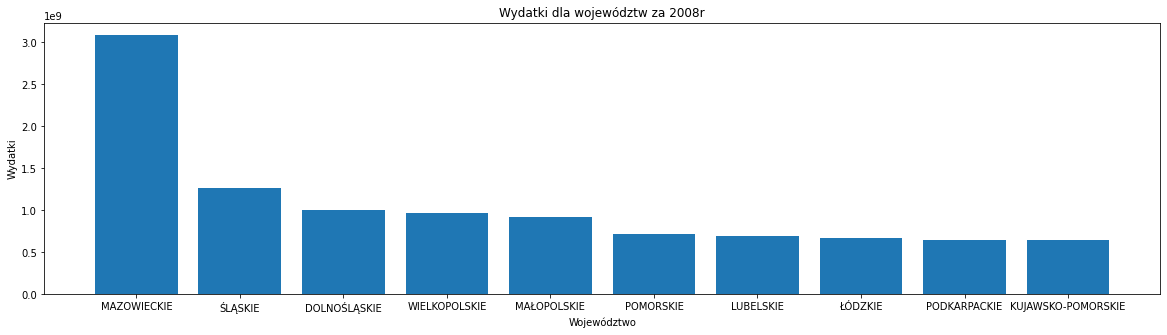

In [70]:
def f(x):
    return x[4]

posort_dane = sorted(lst, key=f, reverse = True)
posort_top10 = posort_dane[:10]

woje = [row[1] for row in posort_top10]
wydatki = [row[4] for row in posort_top10]

fig = plt.figure(figsize = (20, 5))
plt.bar(woje, wydatki)
plt.xlabel('Województwo')
plt.ylabel('Wydatki')
plt.title('Wydatki dla województw za 2008r')
plt.show()

#### Zadanie 5

Wczytaj dane z pliku `dane-ludnosc.npz`. Plik ten zawiera zbiór danych zawierający **liczbę ludnosci**.

Oblicz wydatki z budżetu na mieszkańca dla każdego z województw (_uwzględnij dane dla roku `2008`_).


In [71]:
with open('./dataset/dane-ludnosc.npz', 'rb') as f:
    content = np.load(f)
    columns_ludnosc, data_ludnosc = content['columns'].tolist(), content['data'].tolist()

lst_lundosc = []
for row in data_ludnosc:
    if row[4] == "2008" and row[1] != "POLSKA":
        row[5] = float(row[5])
        lst_lundosc.append(row)   
woj_per = []

for row_ludnosc in lst_lundosc:
    for row in lst:
        print(row)
        if row_ludnosc[1] == row[1]:
            cost_person = row[4]/float(row_ludnosc[5])
            woj_per.append([row_ludnosc[1],cost_person])
        else:
            pass
            
woj_per

['200000', 'DOLNOŚLĄSKIE', 'ogółem', 'ogółem', '2008', 2877059.0, 'osoba']
['200000', 'DOLNOŚLĄSKIE', 'ogółem', '2008', 1006184128.91, 'zł']
['400000', 'KUJAWSKO-POMORSKIE', 'ogółem', '2008', 640715844.5, 'zł']
['600000', 'LUBELSKIE', 'ogółem', '2008', 698605287.8, 'zł']
['800000', 'LUBUSKIE', 'ogółem', '2008', 340059853.25, 'zł']
['1000000', 'ŁÓDZKIE', 'ogółem', '2008', 664259917.26, 'zł']
['1200000', 'MAŁOPOLSKIE', 'ogółem', '2008', 923339420.95, 'zł']
['1400000', 'MAZOWIECKIE', 'ogółem', '2008', 3079249722.19, 'zł']
['1600000', 'OPOLSKIE', 'ogółem', '2008', 371920722.19, 'zł']
['1800000', 'PODKARPACKIE', 'ogółem', '2008', 646018737.58, 'zł']
['2000000', 'PODLASKIE', 'ogółem', '2008', 334514182.9, 'zł']
['2200000', 'POMORSKIE', 'ogółem', '2008', 712235165.04, 'zł']
['2400000', 'ŚLĄSKIE', 'ogółem', '2008', 1263238190.05, 'zł']
['2600000', 'ŚWIĘTOKRZYSKIE', 'ogółem', '2008', 374074677.24, 'zł']
['2800000', 'WARMIŃSKO-MAZURSKIE', 'ogółem', '2008', 449534924.36, 'zł']
['3000000', 'WIELKO

[['DOLNOŚLĄSKIE', 349.726623232266],
 ['KUJAWSKO-POMORSKIE', 309.8361949071482],
 ['LUBELSKIE', 323.15429126777656],
 ['LUBUSKIE', 337.03930698083775],
 ['ŁÓDZKIE', 260.61049121941136],
 ['MAŁOPOLSKIE', 280.894803546309],
 ['MAZOWIECKIE', 591.6519704966572],
 ['OPOLSKIE', 360.0254803202199],
 ['PODKARPACKIE', 307.7019652726013],
 ['PODLASKIE', 280.75753724390876],
 ['POMORSKIE', 320.89719048151125],
 ['ŚLĄSKIE', 271.9176242906021],
 ['ŚWIĘTOKRZYSKIE', 293.9027181674188],
 ['WARMIŃSKO-MAZURSKIE', 315.00485564508614],
 ['WIELKOPOLSKIE', 283.35716739997474],
 ['ZACHODNIOPOMORSKIE', 316.63093441829886]]

#### Zadanie 6

Wykonaj dalszą analizę zbiorów danych (dowolną). Czy coś ciekawego zaobserwowałeś?


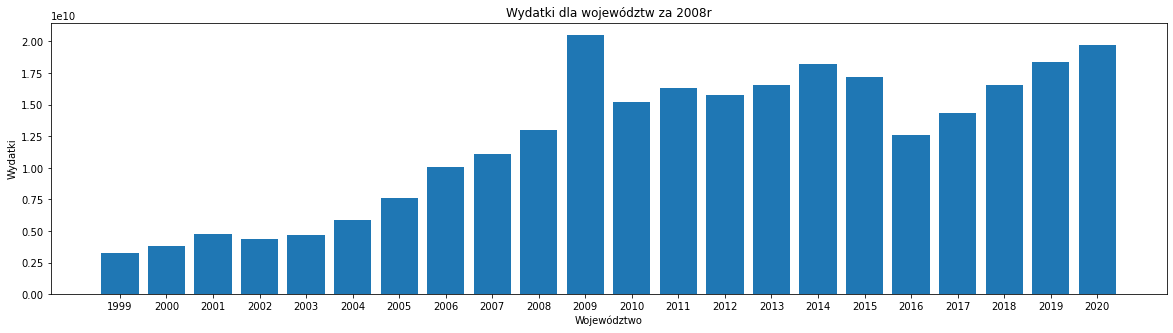

In [74]:
lst_moje = []
for row in data:
    if row[1] == "POLSKA":
        row[4] = float(row[4])
        lst_moje.append(row)
lst_moje

rok = [row[3] for row in lst_moje]
wydatki_kraj = [row[4] for row in lst_moje]

fig = plt.figure(figsize = (20, 5))
plt.bar(rok, wydatki_kraj)
plt.xlabel('Województwo')
plt.ylabel('Wydatki')
plt.title('Wydatki dla województw za 2008r')
plt.show()